In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import pandas_datareader.data as web
import datetime
%matplotlib inline
from scipy.stats import norm
from pandas.tools.plotting import scatter_matrix

In [18]:
start = datetime.datetime(2010, 1, 1) #starting date
end = datetime.datetime(2020, 4, 6) #ending date

repsol = web.DataReader("REP.MC", 'yahoo', start, end) #(stock, platform, start, end)
bp = web.DataReader("BP", 'yahoo', start, end)
galp = web.DataReader("GALP.LS", 'yahoo', start, end)
shell = web.DataReader("RDS-A", 'yahoo', start, end)
ibex = web.DataReader("^IBEX", 'yahoo', start, end)
oil = web.DataReader("CL=F", 'yahoo', start, end)
brent = web.DataReader("BZ=F", 'yahoo', start, end)

In [19]:
df_corr = pd.DataFrame({'Repsol' : repsol['Close'],
                        'BP' : bp['Close'],
                        'GALP' : galp['Close'],
                        'SHELL' : shell['Close'],
                        'IBEX' : ibex['Close'],
                        'OIL' : oil['Close'],
                        'BRENT' : brent['Close']})

In [20]:
porc_cambio = df_corr.pct_change()
porc_cambio.corr()

,Repsol,BP,GALP,SHELL,IBEX,OIL,BRENT
Repsol,1.000000,0.536087,0.638084,0.579536,0.779777,0.288832,0.253058
BP,0.536087,1.000000,0.481202,0.779743,0.439159,0.273140,0.268580
GALP,0.638084,0.481202,1.000000,0.515175,0.558424,0.277236,0.209009
SHELL,0.579536,0.779743,0.515175,1.000000,0.488890,0.301483,0.315964
IBEX,0.779777,0.439159,0.558424,0.488890,1.000000,0.192210,0.166426
OIL,0.288832,0.273140,0.277236,0.301483,0.192210,1.000000,0.481982
BRENT,0.253058,0.268580,0.209009,0.315964,0.166426,0.481982,1.000000


Text(0,0.5,'Returns GALP')

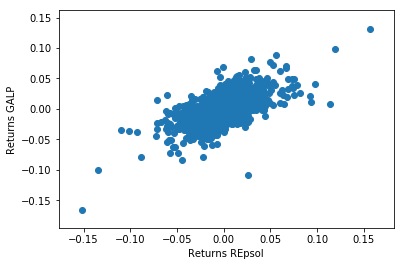

In [21]:
plt.scatter(porc_cambio.Repsol, porc_cambio.GALP)
plt.xlabel('Returns REpsol')
plt.ylabel('Returns GALP')

C:\Users\ramir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.



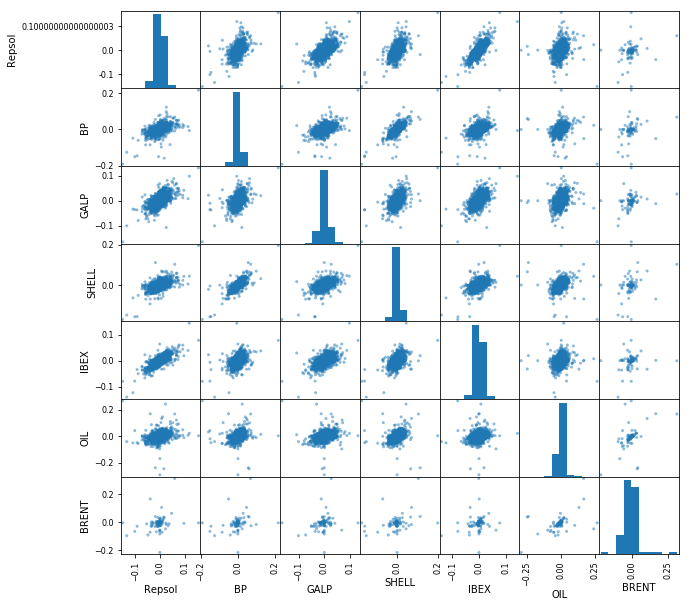

In [22]:
sm = scatter_matrix(porc_cambio, figsize = (10,10))

Hay una corrlación positiva entre Repsol, el IBEX y GALP. El IBEX corresponde al indice donde opera Repsol y GALP es una petrolera portuguesa. Parece que influye más lo que pasa en España y en la península que el precio mismo del petróleo, aun que tiene relación.